# JM0250 Data Visualization 
### Academic year 2022-2023

## FIFA World Cup 2022 Data Exploration
Data sources:

- FIFA World Cup 2022 Player Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-player-data)
- FIFA World Cup 2022 Match Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-match-data)
- FIFA World Cup 2022 Team Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-statistics)
- FIFA World Cup 2022 Twitter Dataset (https://www.kaggle.com/datasets/kumari2000/fifa-world-cup-twitter-dataset-2022)
- FIFA World Cup 2022 Prediction (https://www.kaggle.com/datasets/shilongzhuang/soccer-world-cup-challenge)
- FIFA World Cup 2022 Player Images (https://www.kaggle.com/datasets/soumendraprasad/fifa-2022-all-players-image-dataset)
- FIFA World Cup Historic (https://www.kaggle.com/datasets/piterfm/fifa-football-world-cup)
- FIFA World Cup Penalty Shootouts (https://www.kaggle.com/datasets/pablollanderos33/world-cup-penalty-shootouts, https://www.kaggle.com/datasets/jandimovski/world-cup-penalty-shootouts-2022)

Data dictionaries and additional info can be found in the respective data folders.

In [2]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Do not truncate tables
pd.set_option('display.max_columns', None)

In [3]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Do not truncate tables
pd.set_option('display.max_columns', None)

In [4]:
# Load the data

# Match data
df_match_data = pd.read_csv('../Data/FIFA World Cup 2022 Match Data/data.csv', delimiter=',')

# Player data
df_player_defense       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_defense.csv', delimiter=',')
df_player_gca           = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_gca.csv', delimiter=',')
df_player_keepers       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_keepers.csv', delimiter=',')
df_player_keepersadv    = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_keepersadv.csv', delimiter=',')
df_player_misc          = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_misc.csv', delimiter=',')
df_player_passing       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_passing.csv', delimiter=',')
df_player_passing_types = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_passing_types.csv', delimiter=',')
df_player_playingtime   = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_playingtime.csv', delimiter=',')
df_player_possession    = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_possession.csv', delimiter=',')
df_player_shooting      = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_shooting.csv', delimiter=',')
df_player_stats         = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_stats.csv', delimiter=',')

# Team data
df_team_data        = pd.read_csv('../Data/FIFA World Cup 2022 Team Data/team_data.csv', delimiter=',')
df_team_group_stats = pd.read_csv('../Data/FIFA World Cup 2022 Team Data/group_stats.csv', delimiter=',')

# Historic data
df_historic_fifa_ranking      = pd.read_csv('../Data/FIFA World Cup Historic/fifa_ranking_2022-10-06.csv', delimiter=',')
df_historic_matches_1930_2022 = pd.read_csv('../Data/FIFA World Cup Historic/matches_1930_2022.csv', delimiter=',')
df_historic_world_cup         = pd.read_csv('../Data/FIFA World Cup Historic/world_cup.csv', delimiter=',')

# Penalty shootouts
df_penalty_shootouts = pd.read_csv('../Data/FIFA World Cup Penalty Shootouts/WorldCupShootouts.csv', delimiter=',')

# Twitter data
df_tweets_01 = pd.read_csv('../Data/FIFA World Cup 2022 Twitter Dataset/tweets1.csv', delimiter=';')
df_tweets_02 = pd.read_csv('../Data/FIFA World Cup 2022 Twitter Dataset/tweets2.csv', delimiter=';')
df_tweets = pd.concat([df_tweets_01, df_tweets_02])

# Prediction data
df_prediction_groups  = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/2022_world_cup_groups.csv', delimiter=',')
df_prediction_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/2022_world_cup_matches.csv', delimiter=',')
df_prediction_international_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/international_matches.csv', delimiter=',')
df_prediction_world_cup_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/world_cup_matches.csv', delimiter=',')
df_prediction_world_cups = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/world_cups.csv', delimiter=',')

# Player images
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]

def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img

def showImages(group, land, player):
    images  = list_full_paths('../Data/FIFA World Cup 2022 Player Images/Images/Images/Group ' + group + '/' + land + ' Players/Images_' + player)
    img_arr = []
    
    for image in images:
        img_arr.append(img_reshape(image))
        
    rows = 5
    cols = 5
    img_count = 0
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=((5,5)))
                             
    for i in range(rows):
        for j in range(cols):
            if img_count < len(img_arr):
                axes[i,j].imshow(img_arr[img_count])
                axes[i,j].axis('off')
                img_count+=1
                
    plt.subplots_adjust(wspace=0, hspace=0)
    

In [6]:
df_player_misc.columns

Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes_90s',
       'cards_yellow', 'cards_red', 'cards_yellow_red', 'fouls', 'fouled',
       'offsides', 'crosses', 'interceptions', 'tackles_won', 'pens_won',
       'pens_conceded', 'own_goals', 'ball_recoveries', 'aerials_won',
       'aerials_lost', 'aerials_won_pct'],
      dtype='object')

In [171]:
df_player_defense.columns

Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes_90s',
       'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd',
       'tackles_att_3rd', 'dribble_tackles', 'dribbles_vs',
       'dribble_tackles_pct', 'dribbled_past', 'blocks', 'blocked_shots',
       'blocked_passes', 'interceptions', 'tackles_interceptions',
       'clearances', 'errors'],
      dtype='object')

In [172]:
new_df = df_player_defense[['tackles', 'blocks', 'interceptions']].copy()
new_df = new_df.dropna()
new_df = StandardScaler().fit_transform(new_df)

In [173]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(new_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


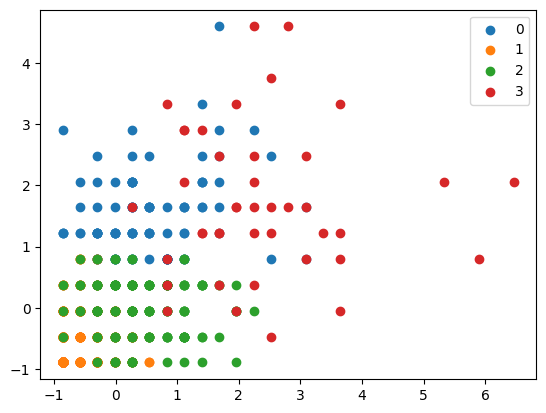

In [174]:
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(new_df[label == i , 0] , new_df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [175]:
all_dfs = (df_player_defense, 
           df_player_gca,          
df_player_keepers,      
df_player_keepersadv,   
df_player_misc,         
df_player_passing,      
df_player_passing_types,
df_player_playingtime,  
df_player_possession,   
df_player_shooting,     
df_player_stats)

In [176]:
def filter_zero_mins_played(df):
    return df[df['minutes_90s']!=0.0]

In [177]:
df_player_defense[df_player_defense['minutes_90s']==0.0]

,player,position,team,age,birth_year,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,blocks,blocked_shots,blocked_passes,interceptions,tackles_interceptions,clearances,errors
7,Abdul Fatawu Issahaku,FW,Ghana,18-285,2004,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
70,Ardon Jasari,FW,Switzerland,20-141,2002,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
73,Asiri Haitham,FW,Saudi Arabia,21-268,2001,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,2.0,0,0.0,1.0,0.0
121,Cho Yumin,FW,Korea Republic,26-031,1996,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
146,Daniel Chacón,MF,Costa Rica,21-251,2001,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
246,Hattan Bahebri,MF,Saudi Arabia,30-155,1992,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
309,Jordan Morris,FW,United States,28-053,1994,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
341,Kamil Grosicki,MF,Poland,34-193,1988,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
354,Kevin Rodríguez,FW,Ecuador,22-289,2000,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
368,Kristijan Jakić,FW,Croatia,25-218,1997,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [178]:
df_player_defense = filter_zero_mins_played(df_player_defense)
df_player_gca = filter_zero_mins_played(df_player_gca)
df_player_keepers = filter_zero_mins_played(df_player_keepers)
df_player_keepersadv = filter_zero_mins_played(df_player_keepersadv)
df_player_passing = filter_zero_mins_played(df_player_passing)
df_player_passing_types = filter_zero_mins_played(df_player_passing_types)
df_player_playingtime = filter_zero_mins_played(df_player_playingtime)
df_player_possession = filter_zero_mins_played(df_player_possession)
df_player_shooting = filter_zero_mins_played(df_player_shooting)
df_player_stats = filter_zero_mins_played(df_player_stats)
df_player_misc = filter_zero_mins_played(df_player_misc)

In [179]:
df_player_gca.columns           

Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes_90s', 'sca',
       'sca_per90', 'sca_passes_live', 'sca_passes_dead', 'sca_dribbles',
       'sca_shots', 'sca_fouled', 'sca_defense', 'gca', 'gca_per90',
       'gca_passes_live', 'gca_passes_dead', 'gca_dribbles', 'gca_shots',
       'gca_fouled', 'gca_defense'],
      dtype='object')

In [180]:
df_player_keepers.columns

Index(['player', 'position', 'team', 'age', 'club', 'birth_year', 'gk_games',
       'gk_games_starts', 'gk_minutes', 'minutes_90s', 'gk_goals_against',
       'gk_goals_against_per90', 'gk_shots_on_target_against', 'gk_saves',
       'gk_save_pct', 'gk_wins', 'gk_ties', 'gk_losses', 'gk_clean_sheets',
       'gk_clean_sheets_pct', 'gk_pens_att', 'gk_pens_allowed',
       'gk_pens_saved', 'gk_pens_missed', 'gk_pens_save_pct'],
      dtype='object')

In [181]:
df_player_keepersadv.columns

Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes_90s',
       'gk_goals_against', 'gk_pens_allowed', 'gk_free_kick_goals_against',
       'gk_corner_kick_goals_against', 'gk_own_goals_against', 'gk_psxg',
       'gk_psnpxg_per_shot_on_target_against', 'gk_psxg_net',
       'gk_psxg_net_per90', 'gk_passes_completed_launched',
       'gk_passes_launched', 'gk_passes_pct_launched', 'gk_passes',
       'gk_passes_throws', 'gk_pct_passes_launched', 'gk_passes_length_avg',
       'gk_goal_kicks', 'gk_pct_goal_kicks_launched',
       'gk_goal_kick_length_avg', 'gk_crosses', 'gk_crosses_stopped',
       'gk_crosses_stopped_pct', 'gk_def_actions_outside_pen_area',
       'gk_def_actions_outside_pen_area_per90', 'gk_avg_distance_def_actions'],
      dtype='object')

In [182]:
df_player_misc.columns

Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes_90s',
       'cards_yellow', 'cards_red', 'cards_yellow_red', 'fouls', 'fouled',
       'offsides', 'crosses', 'interceptions', 'tackles_won', 'pens_won',
       'pens_conceded', 'own_goals', 'ball_recoveries', 'aerials_won',
       'aerials_lost', 'aerials_won_pct'],
      dtype='object')

In [183]:
df_player_misc.sort_values(by='minutes_90s')

,player,position,team,age,birth_year,minutes_90s,cards_yellow,cards_red,cards_yellow_red,fouls,fouled,offsides,crosses,interceptions,tackles_won,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
126,Christian Nørgaard,MF,Denmark,28-283,1994,0.1,0,0,0,0,0,0,0,0,0,0.0,0.0,0,2.0,0.0,0.0,NaN
596,Srđan Babić,DF,Serbia,26-240,1996,0.1,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0,0.0,0.0,NaN
651,Xavi Simons,FW,Netherlands,19-241,2003,0.1,0,0,0,0,1,0,0,0,0,0.0,0.0,0,0.0,1.0,0.0,100.0
161,Denis Odoi,DF,Ghana,34-205,1988,0.1,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,4.0,0.0
650,Wéverton,GK,Brazil,35-005,1987,0.1,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Nicolás Otamendi,DF,Argentina,34-309,1988,7.7,2,0,0,13,5,1,0,9,6,0.0,1.0,0,39.0,21.0,13.0,61.8
325,Joško Gvardiol,DF,Croatia,20-329,2002,7.7,0,0,0,8,6,0,1,11,6,0.0,0.0,0,48.0,3.0,5.0,37.5
170,Dominik Livaković,GK,Croatia,27-343,1995,7.7,1,0,0,1,0,0,0,0,0,0.0,1.0,0,11.0,1.0,0.0,100.0
388,Lionel Messi,FW,Argentina,35-177,1987,7.7,1,0,0,10,22,3,20,0,3,1.0,0.0,0,22.0,2.0,7.0,22.2


In [184]:
df_player_passing.columns

Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes_90s',
       'passes_completed', 'passes', 'passes_pct', 'passes_total_distance',
       'passes_progressive_distance', 'passes_completed_short', 'passes_short',
       'passes_pct_short', 'passes_completed_medium', 'passes_medium',
       'passes_pct_medium', 'passes_completed_long', 'passes_long',
       'passes_pct_long', 'assists', 'xg_assist', 'pass_xa', 'xg_assist_net',
       'assisted_shots', 'passes_into_final_third', 'passes_into_penalty_area',
       'crosses_into_penalty_area', 'progressive_passes'],
      dtype='object')

In [185]:
df_player_passing_types.columns


Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes_90s',
       'passes', 'passes_live', 'passes_dead', 'passes_free_kicks',
       'through_balls', 'passes_switches', 'crosses', 'throw_ins',
       'corner_kicks', 'corner_kicks_in', 'corner_kicks_out',
       'corner_kicks_straight', 'passes_completed', 'passes_offsides',
       'passes_blocked'],
      dtype='object')

In [186]:
df_player_playingtime.columns


Index(['player', 'position', 'team', 'age', 'birth_year', 'games', 'minutes',
       'minutes_per_game', 'minutes_pct', 'minutes_90s', 'games_starts',
       'minutes_per_start', 'games_complete', 'games_subs', 'minutes_per_sub',
       'unused_subs', 'points_per_game', 'on_goals_for', 'on_goals_against',
       'plus_minus', 'plus_minus_per90', 'plus_minus_wowy', 'on_xg_for',
       'on_xg_against', 'xg_plus_minus', 'xg_plus_minus_per90',
       'xg_plus_minus_wowy'],
      dtype='object')

In [187]:
df_player_possession.columns


Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes_90s',
       'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_pen_area', 'touches_live_ball',
       'dribbles_completed', 'dribbles', 'dribbles_completed_pct',
       'miscontrols', 'dispossessed', 'passes_received',
       'progressive_passes_received'],
      dtype='object')

In [188]:
df_player_shooting.columns

Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes_90s',
       'goals', 'shots', 'shots_on_target', 'shots_on_target_pct',
       'shots_per90', 'shots_on_target_per90', 'goals_per_shot',
       'goals_per_shot_on_target', 'average_shot_distance', 'shots_free_kicks',
       'pens_made', 'pens_att', 'xg', 'npxg', 'npxg_per_shot', 'xg_net',
       'npxg_net'],
      dtype='object')

In [189]:
df_player_defense['blocked_shots_per_90s'] = df_player_defense['blocked_shots'] / df_player_defense['minutes_90s']
df_player_defense['blocked_passes_per_90s'] = df_player_defense['blocked_passes'] / df_player_defense['minutes_90s']
df_player_defense['blocked_interceptions_per_90s'] = df_player_defense['interceptions'] / df_player_defense['minutes_90s']
df_player_defense['tackles_won_percentage'] = df_player_defense['tackles_won'] / df_player_defense['tackles']


/var/folders/7c/0115bvmd5_z76gpkl0tqyh8w0000gn/T/ipykernel_672/790483868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player_defense['blocked_shots_per_90s'] = df_player_defense['blocked_shots'] / df_player_defense['minutes_90s']
/var/folders/7c/0115bvmd5_z76gpkl0tqyh8w0000gn/T/ipykernel_672/790483868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player_defense['blocked_passes_per_90s'] = df_player_defense['blocked_passes'] / df_player_defense['minutes_90s']
/var/folders/7c/0115bvmd5_z76g

In [190]:
defense_radar_df = df_player_defense[['player', 'blocked_shots_per_90s','blocked_passes_per_90s', 'blocked_interceptions_per_90s', 'tackles_won_percentage', 'dribble_tackles_pct']]
defense_radar_df

,player,blocked_shots_per_90s,blocked_passes_per_90s,blocked_interceptions_per_90s,tackles_won_percentage,dribble_tackles_pct
0,Aaron Mooy,1.000000,0.500000,0.750000,0.666667,75.0
1,Aaron Ramsey,0.333333,1.000000,0.000000,0.000000,0.0
2,Abdelhamid Sabiri,0.500000,1.000000,2.500000,0.333333,33.3
3,Abdelkarim Hassan,0.333333,0.666667,0.333333,0.428571,75.0
4,Abderrazak Hamdallah,0.000000,0.000000,0.000000,NaN,0.0
...,...,...,...,...,...,...
675,Ángel Di María,0.000000,0.937500,0.312500,0.333333,33.3
676,Ángelo Preciado,0.000000,0.689655,2.068966,0.714286,50.0
677,Éder Militão,0.000000,0.256410,0.769231,0.857143,75.0
678,Óscar Duarte,0.333333,0.666667,2.000000,0.500000,100.0


In [191]:
striker_radar_df = df_player_shooting[['player', 'shots_on_target_pct', 'goals_per_shot', 'average_shot_distance', 'xg', 'shots_per90']]
striker_radar_df

,player,shots_on_target_pct,goals_per_shot,average_shot_distance,xg,shots_per90
0,Aaron Mooy,0.0,0.00,29.1,0.0,0.25
1,Aaron Ramsey,0.0,0.00,18.0,0.0,0.34
2,Abdelhamid Sabiri,0.0,0.00,34.2,0.1,1.49
3,Abdelkarim Hassan,0.0,0.00,23.6,0.3,2.00
4,Abderrazak Hamdallah,50.0,0.00,7.8,0.4,2.65
...,...,...,...,...,...,...
675,Ángel Di María,50.0,0.17,20.7,0.8,1.87
676,Ángelo Preciado,0.0,0.00,26.1,0.1,1.36
677,Éder Militão,20.0,0.00,20.2,0.2,1.30
678,Óscar Duarte,NaN,NaN,NaN,0.0,0.00


In [197]:
goalkeeping_radar_df = pd.merge(df_player_keepers[['player', 'gk_save_pct', 'gk_pens_save_pct']], df_player_keepersadv[['player', 'gk_goal_kick_length_avg', 'gk_passes_length_avg']], on='player', how='inner')
goalkeeping_radar_df.head()

,player,gk_save_pct,gk_pens_save_pct,gk_goal_kick_length_avg,gk_passes_length_avg,gk_goal_kick_length_avg
0,Aimen Dahmen,90.0,NaN,51.1,39.9,51.1
1,Alireza Beiranvand,80.0,NaN,53.1,33.5,53.1
2,Alisson,71.4,NaN,25.6,23.4,25.6
3,Andries Noppert,86.4,0.0,35.7,29.2,35.7
4,André Onana,66.7,NaN,28.6,31.0,28.6


In [193]:
df_player_misc['aerials_won_pct'] = df_player_misc['aerials_won'] / (df_player_misc['aerials_lost'] + df_player_misc['aerials_won'])
df_player_misc

/var/folders/7c/0115bvmd5_z76gpkl0tqyh8w0000gn/T/ipykernel_672/2441070645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player_misc['aerials_won_pct'] = df_player_misc['aerials_won'] / (df_player_misc['aerials_lost'] + df_player_misc['aerials_won'])


,player,position,team,age,birth_year,minutes_90s,cards_yellow,cards_red,cards_yellow_red,fouls,fouled,offsides,crosses,interceptions,tackles_won,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,1,0,0,4,1,0,10,3,6,0.0,0.0,0,35.0,2.0,3.0,0.400000
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,1,0,0,3,3,0,5,0,0,0.0,0.0,0,19.0,0.0,2.0,0.000000
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,1,0,0,2,3,0,1,5,1,0.0,0.0,0,7.0,2.0,2.0,0.500000
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,0,0,0,1,4,1,6,1,3,0.0,0.0,0,11.0,3.0,1.0,0.750000
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.8,0,0,0,3,2,0,0,0,0,0.0,0.0,0,4.0,1.0,7.0,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,34-307,1988,3.2,0,0,0,0,7,5,27,1,1,1.0,0.0,0,7.0,0.0,1.0,0.000000
676,Ángelo Preciado,DF,Ecuador,24-303,1998,2.9,0,0,0,8,2,0,8,6,5,0.0,0.0,0,10.0,3.0,2.0,0.600000
677,Éder Militão,DF,Brazil,24-334,1998,3.9,1,0,0,7,3,0,3,3,6,0.0,0.0,0,29.0,4.0,5.0,0.444444
678,Óscar Duarte,DF,Costa Rica,33-198,1989,3.0,1,0,0,1,0,0,0,6,2,0.0,1.0,0,9.0,2.0,3.0,0.400000


In [194]:
midfielder_radar_df = pd.merge(df_player_passing[['player','xg_assist', 'passes_pct', 'pass_xa']], df_player_gca[['player','gca']],  on='player', how='inner')
midfielder_radar_df = pd.merge(midfielder_radar_df, df_player_misc[['player','aerials_won_pct']], on = 'player', how='inner')
midfielder_radar_df

,player,xg_assist,passes_pct,pass_xa,gca,aerials_won_pct
0,Aaron Mooy,0.1,78.3,0.1,0.0,0.400000
1,Aaron Ramsey,0.0,78.6,0.1,0.0,0.000000
2,Abdelhamid Sabiri,0.9,77.6,0.1,1.0,0.500000
3,Abdelkarim Hassan,0.0,75.8,0.1,1.0,0.750000
4,Abderrazak Hamdallah,0.0,53.3,0.0,0.0,0.125000
...,...,...,...,...,...,...
660,Ángel Di María,0.6,77.4,0.7,4.0,0.000000
661,Ángelo Preciado,0.4,72.9,0.2,1.0,0.600000
662,Éder Militão,0.0,90.6,0.1,0.0,0.444444
663,Óscar Duarte,0.3,69.4,0.0,0.0,0.400000


In [195]:
position_df = df_player_misc[['player', 'position']]
position_df_no_gk = position_df[position_df['position']!='GK']
position_df_no_gk

,player,position
0,Aaron Mooy,MF
1,Aaron Ramsey,MF
2,Abdelhamid Sabiri,MF
3,Abdelkarim Hassan,DF
4,Abderrazak Hamdallah,FW
...,...,...
675,Ángel Di María,MF
676,Ángelo Preciado,DF
677,Éder Militão,DF
678,Óscar Duarte,DF


In [196]:
total_df = pd.merge(midfielder_radar_df, striker_radar_df, on='player', how='inner')
total_df = pd.merge(total_df, defense_radar_df, on='player', how='inner')
total_df = pd.merge(total_df, position_df_no_gk, on='player', how='inner')
total_df

,player,xg_assist,passes_pct,pass_xa,gca,aerials_won_pct,shots_on_target_pct,goals_per_shot,average_shot_distance,xg,shots_per90,blocked_shots_per_90s,blocked_passes_per_90s,blocked_interceptions_per_90s,tackles_won_percentage,dribble_tackles_pct,position
0,Aaron Mooy,0.1,78.3,0.1,0.0,0.400000,0.0,0.00,29.1,0.0,0.25,1.000000,0.500000,0.750000,0.666667,75.0,MF
1,Aaron Ramsey,0.0,78.6,0.1,0.0,0.000000,0.0,0.00,18.0,0.0,0.34,0.333333,1.000000,0.000000,0.000000,0.0,MF
2,Abdelhamid Sabiri,0.9,77.6,0.1,1.0,0.500000,0.0,0.00,34.2,0.1,1.49,0.500000,1.000000,2.500000,0.333333,33.3,MF
3,Abdelkarim Hassan,0.0,75.8,0.1,1.0,0.750000,0.0,0.00,23.6,0.3,2.00,0.333333,0.666667,0.333333,0.428571,75.0,DF
4,Abderrazak Hamdallah,0.0,53.3,0.0,0.0,0.125000,50.0,0.00,7.8,0.4,2.65,0.000000,0.000000,0.000000,NaN,0.0,FW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Ángel Di María,0.6,77.4,0.7,4.0,0.000000,50.0,0.17,20.7,0.8,1.87,0.000000,0.937500,0.312500,0.333333,33.3,MF
620,Ángelo Preciado,0.4,72.9,0.2,1.0,0.600000,0.0,0.00,26.1,0.1,1.36,0.000000,0.689655,2.068966,0.714286,50.0,DF
621,Éder Militão,0.0,90.6,0.1,0.0,0.444444,20.0,0.00,20.2,0.2,1.30,0.000000,0.256410,0.769231,0.857143,75.0,DF
622,Óscar Duarte,0.3,69.4,0.0,0.0,0.400000,NaN,NaN,NaN,0.0,0.00,0.333333,0.666667,2.000000,0.500000,100.0,DF


In [202]:
goalkeeping_radar_df

,player,gk_save_pct,gk_pens_save_pct,gk_goal_kick_length_avg,gk_passes_length_avg,gk_goal_kick_length_avg
0,Aimen Dahmen,90.0,NaN,51.1,39.9,51.1
1,Alireza Beiranvand,80.0,NaN,53.1,33.5,53.1
2,Alisson,71.4,NaN,25.6,23.4,25.6
3,Andries Noppert,86.4,0.0,35.7,29.2,35.7
4,André Onana,66.7,NaN,28.6,31.0,28.6
5,Danny Ward,44.4,NaN,63.1,38.7,63.1
6,Devis Epassy,75.0,NaN,53.4,38.3,53.4
7,Diogo Costa,64.7,NaN,39.6,33.2,39.6
8,Dominik Livaković,80.6,0.0,34.9,26.7,34.9
9,Ederson,66.7,NaN,29.8,25.8,29.8


In [223]:
df_player_basic = df_player_misc[['player', 'birth_year', 'team', 'position']]
df_player_basic = df_player_basic.set_index('player')


In [226]:
df_player_basic.loc['Aaron Mooy']['birth_year']

1990

In [230]:
player_name = 'Aaron Mooy'

In [232]:
f"hi {df_player_basic.loc[player_name]['birth_year']}"

'hi 1990'

In [299]:
df_player_playingtime = df_player_playingtime[df_player_playingtime['games_starts']!=0]
df_player_playingtime.sort_values('games_starts')

,position,team,age,birth_year,games,minutes,minutes_per_game,minutes_pct,minutes_90s,games_starts,minutes_per_start,games_complete,games_subs,minutes_per_sub,unused_subs,points_per_game,on_goals_for,on_goals_against,plus_minus,plus_minus_per90,plus_minus_wowy,on_xg_for,on_xg_against,xg_plus_minus,xg_plus_minus_per90,xg_plus_minus_wowy
player,,,,,,,,,,,,,,,,,,,,,,,,,,
João Mário,FW,Portugal,29-333,1993,2,84.0,42.0,18.7,0.9,1,81.0,0,1,3.0,3,1.50,1.0,2.0,-1.0,-1.07,-2.79,1.3,1.5,-0.2,-0.23,-0.59
Josip Stanišić,DF,Croatia,22-260,2000,1,90.0,90.0,13.0,1.0,1,90.0,1,0,NaN,5,3.00,2.0,1.0,1.0,1.00,1.00,0.7,1.2,-0.5,-0.53,-0.01
Mislav Oršić,FW,Croatia,29-354,1992,6,162.0,27.0,23.5,1.8,1,89.0,0,5,15.0,1,1.50,4.0,2.0,2.0,1.11,1.28,1.9,2.1,-0.2,-0.13,0.50
Mohamed Ali Ben Romdhane,MF,Tunisia,23-103,1999,1,73.0,73.0,27.0,0.8,1,73.0,0,0,NaN,2,3.00,1.0,0.0,1.0,1.23,1.69,0.5,0.2,0.3,0.37,0.74
Gabriel Jesus,FW,Brazil,25-259,1997,3,93.0,31.0,19.4,1.0,1,63.0,0,2,15.0,0,2.00,1.0,0.0,1.0,0.97,0.04,1.8,0.3,1.5,1.49,-0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Emiliano Martínez,GK,Argentina,30-107,1992,7,690.0,99.0,100.0,7.7,7,99.0,7,0,NaN,0,2.00,15.0,8.0,7.0,0.91,NaN,15.2,4.6,10.6,1.51,1.51
Hakim Ziyech,FW,Morocco,29-274,1993,7,635.0,91.0,96.2,7.1,7,91.0,5,0,NaN,0,1.57,6.0,5.0,1.0,0.14,0.14,6.0,7.2,-1.1,-0.17,-0.72
Mateo Kovačić,MF,Croatia,28-226,1994,7,635.0,91.0,92.0,7.1,7,91.0,2,0,NaN,0,1.43,6.0,7.0,-1.0,-0.14,-3.41,6.0,10.6,-4.6,-0.66,-1.67


In [300]:
df_player_stats = df_player_stats.set_index('player')
df_player_defense =df_player_defense.set_index('player')
df_player_misc =df_player_misc.set_index('player')
df_player_passing= df_player_passing.set_index('player')
df_player_shooting= df_player_shooting.set_index('player')
df_player_possession= df_player_possession.set_index('player')
df_player_playingtime =df_player_playingtime.set_index('player')

KeyError: "None of ['player'] are in the columns"

In [379]:
goals = df_player_stats['goals']
xg = df_player_stats['xg']
age = df_player_stats['age']
goal_creating_actions = df_player_gca['gca']
assists = df_player_stats['assists']
appearances = df_player_playingtime['games_starts']
yellow_cards = df_player_stats['cards_yellow']
red_cards = df_player_stats['cards_red']
passes = df_player_passing['passes_completed']
touches = df_player_possession['touches']
shots = df_player_shooting['shots']
offsides = df_player_misc['offsides']
tackles = df_player_defense['tackles']
fouls = df_player_misc['fouls']
dispossessed = df_player_possession['dispossessed']
own_goals = df_player_misc['own_goals']
clearances = df_player_defense['clearances']
aerials_won = df_player_misc['aerials_won']
team = df_player_misc['team']
player = df_player_misc['player']

In [380]:
appearances

0      0
1      4
2      0
3      3
4      2
      ..
824    3
825    4
826    3
827    3
828    0
Name: games_starts, Length: 829, dtype: int64

In [374]:
saves = df_player_keepers['gk_saves']
penalties_saved = df_player_keepers['gk_pens_saved']

In [381]:
main_df = pd.concat([player, goals, assists, appearances, yellow_cards, red_cards, passes, touches, shots, offsides, tackles, fouls, dispossessed, own_goals, clearances, team], axis=1)

In [370]:
main_df.to_csv('main_df.csv')

In [322]:
columns=[{'name': col, 'id': col} for col in main_df.columns]
columns

[{'name': 'goals', 'id': 'goals'},
 {'name': 'assists', 'id': 'assists'},
 {'name': 'games_starts', 'id': 'games_starts'},
 {'name': 'cards_yellow', 'id': 'cards_yellow'},
 {'name': 'cards_red', 'id': 'cards_red'},
 {'name': 'passes_completed', 'id': 'passes_completed'},
 {'name': 'touches', 'id': 'touches'},
 {'name': 'shots', 'id': 'shots'},
 {'name': 'offsides', 'id': 'offsides'},
 {'name': 'tackles', 'id': 'tackles'},
 {'name': 'fouls', 'id': 'fouls'},
 {'name': 'dispossessed', 'id': 'dispossessed'},
 {'name': 'own_goals', 'id': 'own_goals'},
 {'name': 'clearances', 'id': 'clearances'}]

In [323]:
data=main_df.to_dict('records')
data

[{'goals': 0,
  'assists': 0,
  'games_starts': 4.0,
  'cards_yellow': 1,
  'cards_red': 0,
  'passes_completed': 170.0,
  'touches': 255.0,
  'shots': 1,
  'offsides': 0,
  'tackles': 9.0,
  'fouls': 4,
  'dispossessed': 4.0,
  'own_goals': 0,
  'clearances': 9.0},
 {'goals': 0,
  'assists': 0,
  'games_starts': 3.0,
  'cards_yellow': 1,
  'cards_red': 0,
  'passes_completed': 88.0,
  'touches': 147.0,
  'shots': 1,
  'offsides': 0,
  'tackles': 2.0,
  'fouls': 3,
  'dispossessed': 4.0,
  'own_goals': 0,
  'clearances': 2.0},
 {'goals': 0,
  'assists': 1,
  'games_starts': 2.0,
  'cards_yellow': 1,
  'cards_red': 0,
  'passes_completed': 45.0,
  'touches': 86.0,
  'shots': 3,
  'offsides': 0,
  'tackles': 3.0,
  'fouls': 2,
  'dispossessed': 3.0,
  'own_goals': 0,
  'clearances': 3.0},
 {'goals': 0,
  'assists': 0,
  'games_starts': 3.0,
  'cards_yellow': 0,
  'cards_red': 0,
  'passes_completed': 122.0,
  'touches': 193.0,
  'shots': 6,
  'offsides': 1,
  'tackles': 7.0,
  'fouls': 1

In [335]:
teams = ['Australia', 'Germany', 'Portugal']
filter = main_df[main_df['team'].isin(teams)]

In [342]:
df_player_stats[df_player_stats['team']=='Iran']

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90


In [418]:
main_df['rank'] = main_df['goals'].rank(method = 'dense', ascending=False)
main_df = main_df.set_index('rank')
main_df = main_df.sort_values(by='rank', ascending=True)

In [421]:
main_df.head(100)

,player,goals,assists,games_starts,cards_yellow,cards_red,passes_completed,touches,shots,offsides,tackles,fouls,dispossessed,own_goals,clearances,team
rank,,,,,,,,,,,,,,,,
1.0,Kylian Mbappé,8.0,2.0,2,0.0,0.0,173.0,325.0,29.0,6.0,0.0,7.0,10.0,0.0,0.0,France
2.0,Lionel Messi,7.0,3.0,1,1.0,0.0,301.0,460.0,27.0,3.0,5.0,10.0,24.0,0.0,0.0,Argentina
3.0,Olivier Giroud,4.0,0.0,0,1.0,0.0,48.0,111.0,16.0,3.0,1.0,2.0,1.0,0.0,5.0,France
3.0,Julián Álvarez,4.0,0.0,0,0.0,0.0,93.0,174.0,11.0,5.0,4.0,13.0,7.0,0.0,3.0,Argentina
4.0,Cody Gakpo,3.0,0.0,4,0.0,0.0,93.0,205.0,5.0,3.0,8.0,8.0,9.0,0.0,6.0,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.0,Remo Freuler,1.0,0.0,3,0.0,0.0,127.0,197.0,3.0,0.0,8.0,6.0,0.0,0.0,3.0,Switzerland
6.0,Hakim Ziyech,1.0,1.0,0,0.0,0.0,211.0,386.0,10.0,2.0,10.0,12.0,11.0,0.0,4.0,Morocco
6.0,Eric Maxim Choupo-Moting,1.0,0.0,0,0.0,0.0,44.0,87.0,3.0,1.0,4.0,0.0,2.0,0.0,1.0,Cameroon
